In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as  plt
import seaborn as sns
pd.set_option('display.max_columns',None)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
df= pd.read_csv(r'/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv',header=0)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# understanding the data 
print(df.shape)
print(df.dtypes)

print(df.info())


(303, 14)
age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  o

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


1    207
0     96
Name: sex, dtype: int64


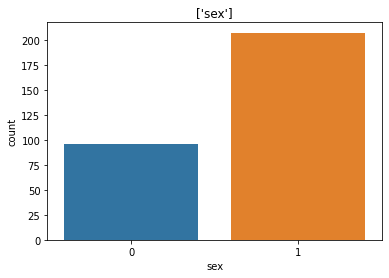

0    143
2     87
1     50
3     23
Name: cp, dtype: int64


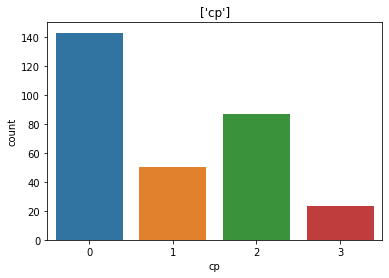

0    258
1     45
Name: fbs, dtype: int64


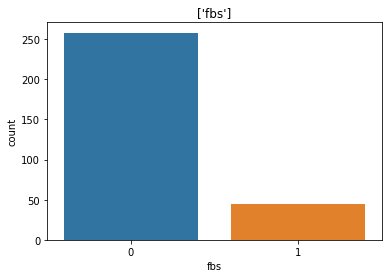

1    152
0    147
2      4
Name: restecg, dtype: int64


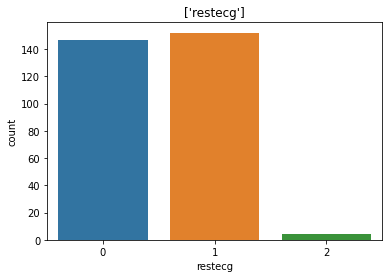

0    204
1     99
Name: exng, dtype: int64


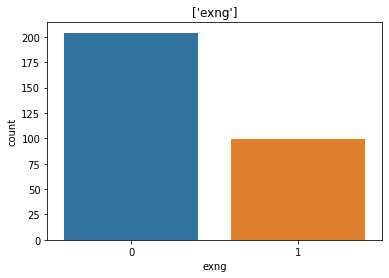

2    142
1    140
0     21
Name: slp, dtype: int64


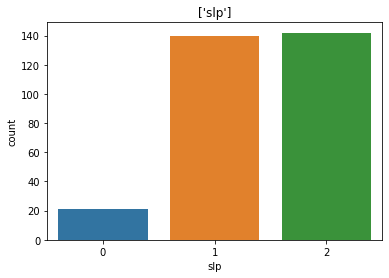

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64


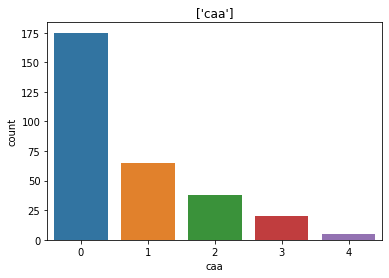

2    166
3    117
1     18
0      2
Name: thall, dtype: int64


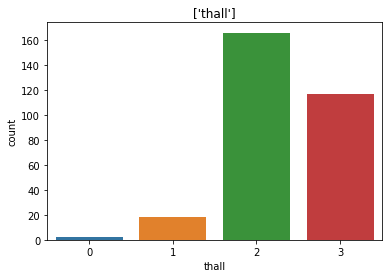

In [7]:
#Understanding the categorical variables
a=['sex','cp','fbs','restecg','exng','slp','caa','thall']
for i in a:
    print(df[i].value_counts())
    sns.countplot(df[i])
    plt.title([i])
    plt.show()


# Handling Missing  Values

In [8]:
# as per the data set  description the variable 'Thal  has to have  only  3  values 1,2 & 3 .  the  value  0  is  given  are  null- values.
df.thall=df.thall.replace(0,np.nan)

print(df.thall.mode())

0    2.0
dtype: float64


In [9]:
df.thall.fillna(df.thall.mode()[0],inplace=True)
print(df.thall.value_counts())


2.0    168
3.0    117
1.0     18
Name: thall, dtype: int64


In [10]:
# checking for  other  mising values 
df.isnull().sum().sort_values(ascending=False)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

               age    trtbps      chol  thalachh   oldpeak
age       1.000000  0.279351  0.213678 -0.398522  0.210013
trtbps    0.279351  1.000000  0.123174 -0.046698  0.193216
chol      0.213678  0.123174  1.000000 -0.009940  0.053952
thalachh -0.398522 -0.046698 -0.009940  1.000000 -0.344187
oldpeak   0.210013  0.193216  0.053952 -0.344187  1.000000


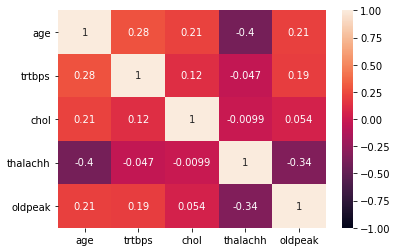

In [11]:
# Checking for correlation between variables 
X=df[["age","trtbps","chol","thalachh","oldpeak"]] 
corr_df=X.corr(method="pearson")
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.savefig("heatmap.jpg")

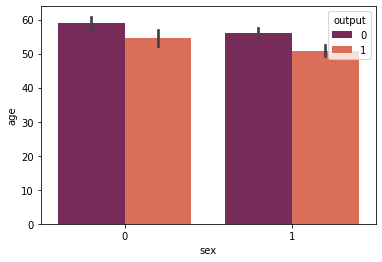

In [12]:
# Relationship between Sex, age and  output 
sns.barplot(x='sex',y='age',data=df,hue='output',palette='rocket')
plt.show()

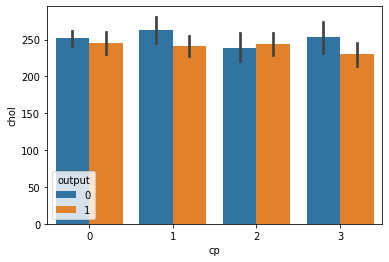

In [13]:
# Different chestpains  and coletrol and  output
sns.barplot(x='cp',y='chol',data=df,hue='output')
plt.show()

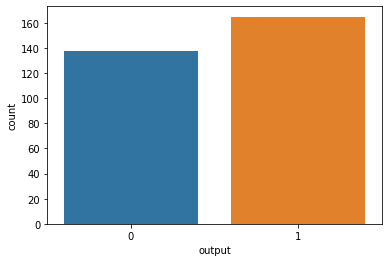

In [14]:
# check biasness in data 
sns.countplot(df.output)
plt.show()

#Insight- Data is  not biased 

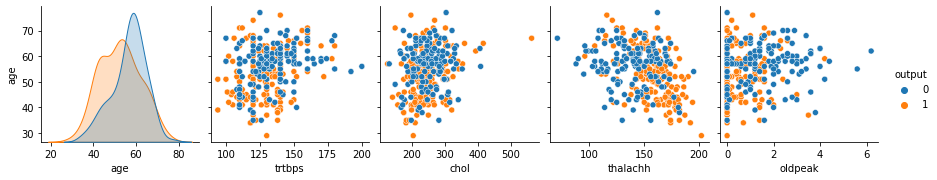

In [15]:

sns.pairplot(x_vars=["age","trtbps","chol","thalachh","oldpeak"],y_vars='age',data=df,hue='output')
plt.show()


# Splitting the Variables

In [16]:
X=df.values[:,0:-1]
Y=df.values[:,-1]
Y=Y.astype(int)

In [17]:
print(X.shape)
print(Y.shape)

(303, 13)
(303,)


# Preprocessing steps

In [18]:
# Scaling the data
from sklearn.preprocessing  import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
print(X)

[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.27938629]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.5613414 ]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.5613414 ]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.15670349]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.15670349]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.5613414 ]]


# Splitting the data

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
lm.fit(X_train,Y_train)
Y_predict=lm.predict(X_test)

In [21]:
print(list(zip(Y_test,Y_predict)))

[(0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 1), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (1, 1), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (1, 1), (0, 1), (0, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 1), (1, 1), (0, 0), (0, 0), (0, 1), (0, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 1), (0, 0), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 1), (0, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 1), (1, 1), (0, 0)]


In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_predict) 
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_predict))

acc=accuracy_score(Y_test, Y_predict)
print("Accuracy of the model: ",acc)

[[33 17]
 [ 4 37]]
Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.66      0.76        50
           1       0.69      0.90      0.78        41

    accuracy                           0.77        91
   macro avg       0.79      0.78      0.77        91
weighted avg       0.80      0.77      0.77        91

Accuracy of the model:  0.7692307692307693


# Tuning Logistic Regression 

In [23]:
y_pred_prob = lm.predict_proba(X_test)
print(y_pred_prob)

[[0.95736209 0.04263791]
 [0.4121733  0.5878267 ]
 [0.76256768 0.23743232]
 [0.18967567 0.81032433]
 [0.90426853 0.09573147]
 [0.29000984 0.70999016]
 [0.15371827 0.84628173]
 [0.26822293 0.73177707]
 [0.11498394 0.88501606]
 [0.89230473 0.10769527]
 [0.02807489 0.97192511]
 [0.9367955  0.0632045 ]
 [0.26346004 0.73653996]
 [0.40403884 0.59596116]
 [0.9054237  0.0945763 ]
 [0.52691142 0.47308858]
 [0.99322353 0.00677647]
 [0.99242297 0.00757703]
 [0.07950382 0.92049618]
 [0.91477473 0.08522527]
 [0.97145592 0.02854408]
 [0.09901313 0.90098687]
 [0.30291224 0.69708776]
 [0.04998522 0.95001478]
 [0.92568603 0.07431397]
 [0.96272122 0.03727878]
 [0.99275898 0.00724102]
 [0.87604492 0.12395508]
 [0.02849736 0.97150264]
 [0.99265702 0.00734298]
 [0.08331497 0.91668503]
 [0.85235952 0.14764048]
 [0.96252511 0.03747489]
 [0.68437519 0.31562481]
 [0.99155062 0.00844938]
 [0.80507983 0.19492017]
 [0.23553933 0.76446067]
 [0.46718872 0.53281128]
 [0.08650585 0.91349415]
 [0.90912703 0.09087297]


#the accuracy has  slightly increased  to  

In [24]:
for i in np.arange(0.4,0.61,0.01):
    predict_new=np.where(y_pred_prob[:,1]>i,1,0)
    cfm=confusion_matrix(Y_test,predict_new)
    total_err=cfm[0,1]+cfm[1,0]
    print('errors at threshold:',i,':',total_err,'Type_1:',cfm[0,1],'type2_error:',cfm[1,0])

errors at threshold: 0.4 : 20 Type_1: 17 type2_error: 3
errors at threshold: 0.41000000000000003 : 20 Type_1: 17 type2_error: 3
errors at threshold: 0.42000000000000004 : 20 Type_1: 17 type2_error: 3
errors at threshold: 0.43000000000000005 : 20 Type_1: 17 type2_error: 3
errors at threshold: 0.44000000000000006 : 20 Type_1: 17 type2_error: 3
errors at threshold: 0.45000000000000007 : 20 Type_1: 17 type2_error: 3
errors at threshold: 0.4600000000000001 : 20 Type_1: 17 type2_error: 3
errors at threshold: 0.4700000000000001 : 20 Type_1: 17 type2_error: 3
errors at threshold: 0.4800000000000001 : 21 Type_1: 17 type2_error: 4
errors at threshold: 0.4900000000000001 : 21 Type_1: 17 type2_error: 4
errors at threshold: 0.5000000000000001 : 21 Type_1: 17 type2_error: 4
errors at threshold: 0.5100000000000001 : 21 Type_1: 17 type2_error: 4
errors at threshold: 0.5200000000000001 : 20 Type_1: 16 type2_error: 4
errors at threshold: 0.5300000000000001 : 20 Type_1: 16 type2_error: 4
errors at thresh

#As its a sensitive data set and we want  to keep the type 2 error  minimal, we choose  0.4  

In [25]:
y_pred_class=[]
for i in y_pred_prob[:,1]:
    if i>0.40:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0]


In [26]:
from sklearn.metrics  import confusion_matrix, accuracy_score,classification_report
accuracy_score= accuracy_score(Y_test,y_pred_class)
print('accuracy:',accuracy_score)
cfm=confusion_matrix(Y_test,y_pred_class)
print('confusion_matrix',cfm)
print(classification_report(Y_test,y_pred_class))

accuracy: 0.7802197802197802
confusion_matrix [[33 17]
 [ 3 38]]
              precision    recall  f1-score   support

           0       0.92      0.66      0.77        50
           1       0.69      0.93      0.79        41

    accuracy                           0.78        91
   macro avg       0.80      0.79      0.78        91
weighted avg       0.81      0.78      0.78        91



In [27]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [28]:
estimators=[]
svc_model=SVC(kernel='rbf',C=30.0,gamma=0.01)
estimators.append(('SVM',svc_model))
model_RF=RandomForestClassifier(n_estimators=35,random_state=10,max_depth=10,min_samples_leaf=5,min_samples_split=6)
estimators.append(('RF',model_RF))
model_LR=LogisticRegression()
estimators.append(('LR',model_LR))
model_knn=model_knn=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),metric='manhattan')
estimators.append(('KNN',model_knn))

In [29]:
ensemble=VotingClassifier(estimators)
ensemble.fit(X_train,Y_train)
Y_pred=ensemble.predict(X_test)

In [30]:
print(list(zip(Y_test,Y_pred)))

[(0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (1, 1), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (1, 1), (0, 1), (0, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 1), (1, 1), (0, 0), (0, 0), (0, 1), (0, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 1), (0, 0), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 1), (0, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 1), (1, 1), (0, 0)]


In [31]:
from sklearn.metrics  import confusion_matrix, accuracy_score,classification_report
accuracy_score= accuracy_score(Y_test,Y_pred)
print('accuracy:',accuracy_score)
cfm=confusion_matrix(Y_test,Y_pred)
print('confusion_matrix',cfm)
print(classification_report(Y_test,Y_pred))

accuracy: 0.8131868131868132
confusion_matrix [[36 14]
 [ 3 38]]
              precision    recall  f1-score   support

           0       0.92      0.72      0.81        50
           1       0.73      0.93      0.82        41

    accuracy                           0.81        91
   macro avg       0.83      0.82      0.81        91
weighted avg       0.84      0.81      0.81        91



# USING THE  MODELS  GIVING  BETTER RECALL VALUE  FOR  CLASS1 

In [32]:
estimators=[]
svc_model=SVC(kernel='rbf',C=30.0,gamma=0.01)
estimators.append(('SVM',svc_model))
model_RF=RandomForestClassifier(n_estimators=35,random_state=10,max_depth=10,min_samples_leaf=5,min_samples_split=6)
estimators.append(('RF',model_RF))


In [33]:
ensemble=VotingClassifier(estimators)
ensemble.fit(X_train,Y_train)
Y_pred=ensemble.predict(X_test)

In [34]:
print(list(zip(Y_test,Y_pred)))

[(0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (1, 1), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 1), (1, 1), (0, 0), (0, 0), (0, 1), (0, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 1), (0, 0), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0)]


In [35]:
from sklearn.metrics  import confusion_matrix, accuracy_score,classification_report
accuracy_score= accuracy_score(Y_test,Y_pred)
print('accuracy:',accuracy_score)
cfm=confusion_matrix(Y_test,Y_pred)
print('confusion_matrix',cfm)
print(classification_report(Y_test,Y_pred))

accuracy: 0.8571428571428571
confusion_matrix [[40 10]
 [ 3 38]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86        50
           1       0.79      0.93      0.85        41

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.87      0.86      0.86        91



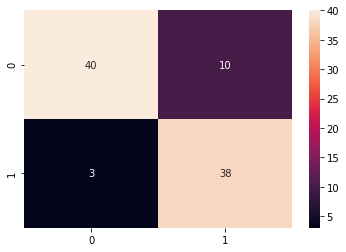

In [36]:
# Using Ensemble  model  with SVM  and  Random forest Classifiers
sns.heatmap(cfm,annot=True)
plt.show()